In [1]:
__author__ = "me"
__date__ = "2016_02_01"


import matplotlib
matplotlib.use('Agg')


%pylab inline


import matplotlib.pyplot as plt

import sqlite3
import datetime
import dateutil.parser
import pandas as pd
import geopandas as gp
from shapely.geometry import Point

import os
import ast

from misc import mostRecentFile

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getSQLiteTweets(path):
    '''gets all data as tuple'''
    conn = sqlite3.connect(path)
    data = conn.cursor().execute('SELECT * FROM tweets').fetchall() ## all but raw data
    conn.close()
    return data

def getDF(path):
    data = getSQLiteTweets(path)
    columns = ('id','timestamp','lon', 'lat', 'tweet', 'user_id', 'rtwts', 'fvrts', 'application', 'source')
    
    return pd.DataFrame(data, columns=columns )
    

In [3]:
def toGeoDataFrame(df, lat='Latitude',lon='Longitude'):
    '''dataframe to geodataframe'''
    df['geometry'] = df.apply(lambda z: Point(z[lon], z[lat]), axis=1)
    df = gp.GeoDataFrame(df)
    df.crs = {'init': 'epsg:4326', 'no_defs': True}
    return df 

In [39]:
folder = os.getenv('PWD') + '/data/MASTERDB/'
path = mostRecentFile(folder)

In [40]:
df = getDF(path)
df = df[pd.notnull(df.lat)]

In [41]:
df['ts'] = pd.to_datetime(df.timestamp, unit='s')
df['ts'] = df['ts'] - datetime.timedelta(hours=5) ## UTS - 5h NYC

In [42]:
df.head(2)

,id,timestamp,lon,lat,tweet,user_id,rtwts,fvrts,application,source,ts
0,550441283261857792,1420088403,-73.816546,40.673936,My face when people say some dumb shxt that do...,2466734767,0,0,Twitter for iPhone,M,2015-01-01 00:00:03
1,550441288076914688,1420088404,-74.003244,40.709564,“@WorIdStarComedy: this how niggas bout to be ...,420630924,0,0,Twitter for iPhone,M,2015-01-01 00:00:04


## Records total

In [43]:
df.shape

(5228190, 11)

In [50]:
df1.user_id.unique().shape

(301168,)

## Time Range

In [51]:
df.ts.describe()

count                 5228190
unique                4118708
top       2015-02-07 03:00:53
freq                      104
first     2015-01-01 00:00:03
last      2016-02-22 19:50:13
Name: ts, dtype: object

## Sources

In [52]:
df.source.value_counts()

M                                4428802
twitter1.db                       587711
GNIP_Nov17_28                      51484
DO2_2016-02-19 14:09               45072
C_2016_02_12_twitter.db            33650
DO_2016_02_07_twitter.db           22016
DO_2016_02_12_twitter.db           15708
gnip                               13029
C_2016_02_9_twitterB.db            12095
DO2_2016-02-18 17:43                9314
C_2016_02_08.db                     3277
C_2016_02_7_Cusp_twitter.db         2701
CUSP2_2016-02-21 19:16              1064
C_2016_02_10.db                     1050
DO_2016_02__6_twitter.db             589
twitter2.db                          221
CUSP2_2016-02-19 14:50               142
DO2_2016-02-19 14:08                  94
DO2_2016-02-19 14:03                  73
C_2016_92_7_Cusp_twitter_1.db         54
CUSP2_2016-02-19 09:29                44
Name: source, dtype: int64

## APPS

In [53]:
df.application.unique().shape

(273,)

In [75]:
df.application.value_counts().head(30)

Twitter for iPhone             2575002
Instagram                       902433
Twitter for Android             580490
Foursquare                      186163
Twitter for iPad                 89944
dlvr.it                          33263
Tweetbot for iΟS                 21398
Squarespace 6                    19959
Twitter for Android Tablets      18646
iOS                              14670
Twitter for Windows Phone        13748
Untappd                           9743
COS App                           8295
Tweetlogix                        5962
TweetMyJOBS                       4920
Goldstar                          4099
TweetCaster for Android           4028
Path                              3903
Beer Menus                        3494
pbump.net                         3392
twitterfeed                       3234
511NY-Tweets                      2836
dine here                         2666
twitrriffic                       2299
Tweetbot for Mac                  2246
Squarespace              

In [84]:
bots = ('CareerCenter', 'SafeTweet by TweetMyJOBS', 'Goldstar', 'TweetMyJOBS','dlvr.it', 'dine here', 'kickalert', 'pbump.net' )

In [85]:
df[df.application == 'kickalert'].tweet.head(10)

72809    @Sahsworld The Horrorist and Devil Disco with ...
76726    @sparkycollier !!! (Chk Chk Chk) at @unionpool...
76727    @sparkycollier !!! (Chk Chk Chk) at @unionpool...
76728    @sparkycollier !!! (Chk Chk Chk) at @unionpool...
76730    @sparkycollier !!! (Chk Chk Chk) at @unionpool...
76742    @iamclacky !!! (Chk Chk Chk) at @unionpool (Ja...
76743    @iamclacky !!! (Chk Chk Chk) at @unionpool (Ja...
76744    @iamclacky !!! (Chk Chk Chk) at @unionpool (Ja...
76745    @iamclacky !!! (Chk Chk Chk) at @unionpool (Ja...
76750    @tolar !!! (Chk Chk Chk) at @unionpool (Jan 10...
Name: tweet, dtype: object

## USERS

In [86]:
uCount = df.user_id.value_counts()
uCount.describe()

count    301168.000000
mean         17.359713
std         132.204238
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max       29073.000000
Name: user_id, dtype: float64

In [87]:
len(uCount[uCount>1])

198058

In [88]:
singles = uCount[uCount==1].index.tolist()
len(uCount[uCount==1])

103110

In [89]:
top = uCount.head(30).index.tolist()

df[df.user_id == top[4]].head(20).tweet

304405     Accident on I-278 WB at Kane Street http://t.c...
347170     Construction on I-95 NB at Marmion Avenue http...
347201     Incident on # 1 Line SB at 34th Street-Penn St...
347365     Disabled vehicle on I-495 EB at Exit 26 - Fran...
347367     Construction on I-95 SB at Ellis Avenue http:/...
463433     Incident on E Line SB from 42nd Street-Port Au...
604413     Accident on Grand Central Parkway EB at Jackie...
1051214    Update: Construction on # 2 Line Bronx bound f...
1051412    Update: Construction on # 6 Line SB from Parkc...
1084037    Delays on I-678 NB from Exit 5 - 101st Avenue ...
1092874    Delays on I-278 EB from East 138th Street; I-2...
1092877    Delays on I-495 WB from Exit 20 - Junction Bou...
1093053    Parking related on La Guardia Airport at Termi...
1364038    Construction on Verrazano-Narrows Bridge WB at...
1613341    Update: Delays on I-278 WB from Exit 35 - I-49...
1618829    Construction on East 92nd Street from 5th Aven...
2303918    Update: Delay

In [90]:
# users not within top21 and not single-shots
len(df[(~df.user_id.isin(top[:21])) & (~ df.user_id.isin(singles)) ])

4915448

In [91]:
# cleanData = df[(~df.user_id.isin(top[:21])) & (~ df.user_id.isin(singles)) ]
cleanData = df[(~df.user_id.isin(top[:21]))]

## Timeline

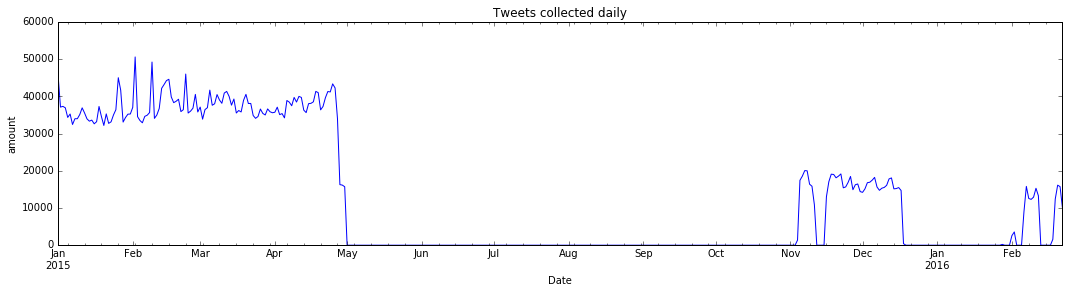

In [92]:
def timeCoverage(df, timeCol='ts', countCol='id', rs='D'):
    dft = df[[timeCol, countCol]].set_index(timeCol).resample(rs, how='count')
    dft.plot(figsize=(18,4), legend=0, title='Tweets collected daily');
    plt.xlabel('Date');
    plt.ylabel('amount');

timeCoverage(df)

## TIME grouping

In [93]:
s = df[['id', 'ts']].set_index('ts').resample('15Min', how='count')

In [94]:
s.reset_index(inplace=1)
s['id'] = s['id'].astype(float)


s['wd'] = s['ts'].dt.weekday
s['hour'] = s['ts'].dt.hour
s['minute'] = s['ts'].dt.minute

sg = s.groupby(['wd', 'hour', 'minute']).agg('mean')
sg.reset_index(inplace=1)

In [95]:
sg.head()

,wd,hour,minute,id
0,0,0,0,218.333333
1,0,0,15,225.983333
2,0,0,30,224.916667
3,0,0,45,231.516667
4,0,1,0,255.383333


In [96]:
sg['timestamp'] = sg.apply(lambda x: datetime.datetime(year=2015, 
                                                       month=1, 
                                                       day=(int(x.wd)+1), 
                                                       hour=int(x.hour), 
                                                       minute=int(x.minute)), 1)

In [97]:
sg.head()

,wd,hour,minute,id,timestamp
0,0,0,0,218.333333,2015-01-01 00:00:00
1,0,0,15,225.983333,2015-01-01 00:15:00
2,0,0,30,224.916667,2015-01-01 00:30:00
3,0,0,45,231.516667,2015-01-01 00:45:00
4,0,1,0,255.383333,2015-01-01 01:00:00


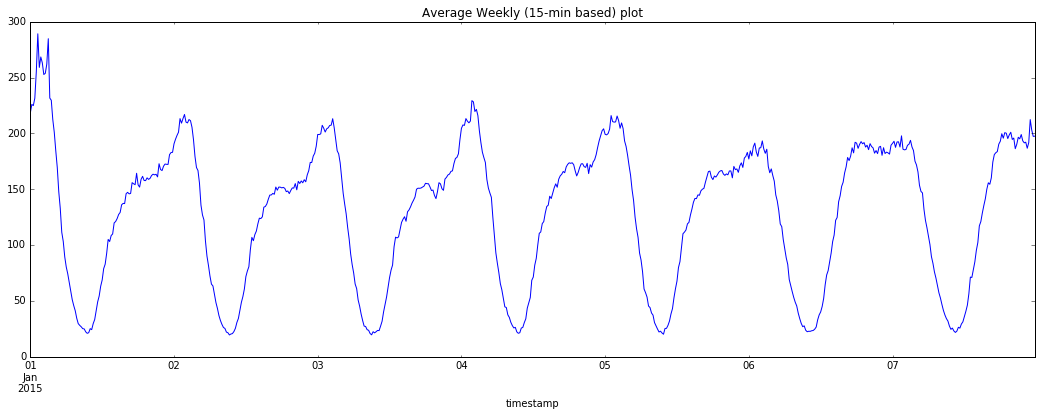

In [98]:
sg[['id', 'timestamp']].set_index('timestamp').plot(figsize=(18,6), legend=0, title='Average Weekly (15-min based) plot');

In [99]:
def averageWeek(df, ax):
    '''calculate average week on ts'''
    
    s = df[['id', 'ts']].set_index('ts').resample('15Min', how='count')
    s.reset_index(inplace=1)
    s['id'] = s['id'].astype(float)

    s['wd'] = s['ts'].dt.weekday
    s['hour'] = s['ts'].dt.hour
    s['minute'] = s['ts'].dt.minute

    sg = s.groupby(['wd', 'hour', 'minute']).agg('mean')
    sg.reset_index(inplace=1)
    
    sg['timestamp'] = sg.apply(lambda x: datetime.datetime(year=2015, 
                                                       month=1, 
                                                       day=(int(x.wd)+1), 
                                                       hour=int(x.hour), 
                                                       minute=int(x.minute)), 1)
    
    sg[['id', 'timestamp']].set_index('timestamp')
                           .plot(ax=ax);

IndentationError: unexpected indent (<ipython-input-99-12eac6578011>, line 22)

## Geography

In [100]:
gdf  = toGeoDataFrame(df, lat='lon',lon='lat')

In [101]:
zipPath = '/Users/casy/Dropbox/CUSP/GRA/QQ_GRA/CUSP_QC_twitter_scripts/data/misk/nyc-zip-code-tabulation-areas-polygons.geojson'

In [102]:
zips = gp.read_file(zipPath)

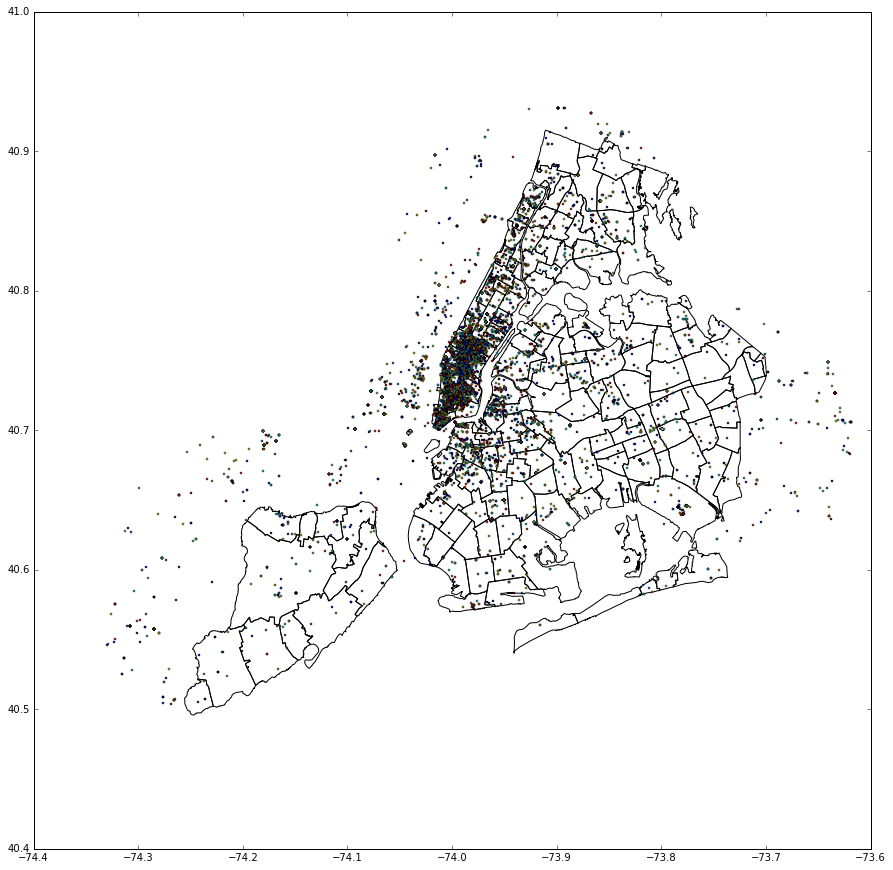

In [103]:
fig,ax = plt.subplots(figsize=(15,15))
zips.plot(alpha=0, ax=ax)
gdf[-10000:].plot(ax=ax)

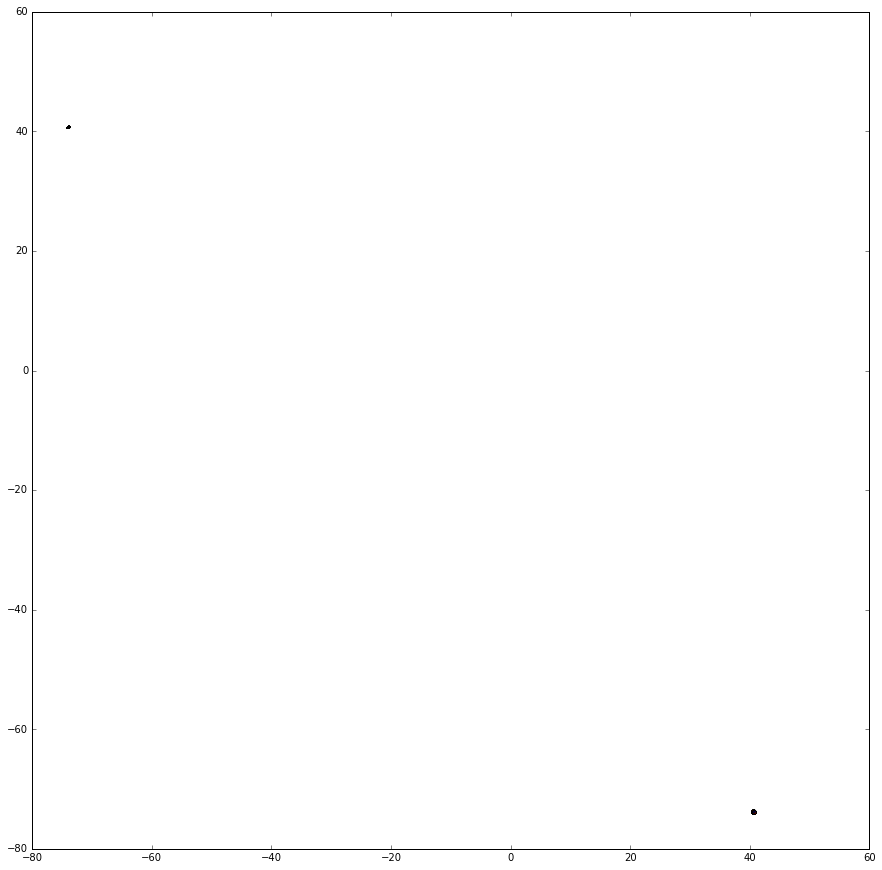

In [104]:
fig,ax = plt.subplots(figsize=(15,15))
zips.plot(alpha=0, ax=ax)
gdf[:10000].plot(ax=ax)